In [1]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers as layers
from tensorflow.keras.layers import GlobalMaxPooling2D, Activation, Dense, Conv1D, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization, GlobalMaxPooling1D
from tensorflow.keras import optimizers


%matplotlib inline
folder = '../resources/dataset1/'
mats = []
#mats.append(scipy.io.loadmat(folder+'BCICIV_calib_ds1a.mat'))
mats.append(scipy.io.loadmat(folder+'BCICIV_calib_ds1b.mat'))
mats.append(scipy.io.loadmat(folder+'BCICIV_calib_ds1c.mat'))
mats.append(scipy.io.loadmat(folder+'BCICIV_calib_ds1d.mat'))
mats.append(scipy.io.loadmat(folder+'BCICIV_calib_ds1e.mat'))
#mats.append(scipy.io.loadmat(folder+'BCICIV_calib_ds1f.mat'))
mats.append(scipy.io.loadmat(folder+'BCICIV_calib_ds1g.mat'))


In [12]:
min(mats[0]['cnt'][0])
mats[0]['cnt']

array([[ -105,   -52,   -37, ...,   -20,   -21,   -19],
       [ -917,  -456,  -335, ...,  -173,  -172,  -155],
       [-2198, -1086,  -822, ...,  -395,  -388,  -340],
       ...,
       [ 1250,  1834,   522, ...,  1961,  1474,  1862],
       [ 1264,  1867,   534, ...,  1996,  1473,  1877],
       [ 1246,  1846,   508, ...,  2032,  1418,  1924]], dtype=int16)

2085


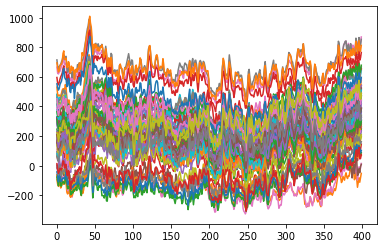

In [24]:
first_pos=mats[0]['mrk'][0][0][0][0][0]
print(first_pos)
plt.plot(mats[0]['cnt'][first_pos:first_pos+400])
plt.show()

In [20]:
mats[0]['mrk']

array([[(array([[  2085,   2885,   3685,   4485,   5285,   6085,   6885,   7685,
          8485,   9285,  10085,  10885,  11685,  12485,  13285,  16286,
         17086,  17886,  18687,  19486,  20286,  21086,  21886,  22686,
         23486,  24286,  25086,  25886,  26686,  27486,  30487,  31287,
         32087,  32887,  33687,  34487,  35287,  36087,  36887,  37687,
         38487,  39287,  40087,  40887,  41687,  44688,  45488,  46288,
         47088,  47888,  48688,  49488,  50288,  51088,  51888,  52688,
         53488,  54288,  55088,  55888,  58887,  59687,  60487,  61287,
         62087,  62887,  63687,  64487,  65287,  66087,  66887,  67687,
         68487,  69287,  70087,  73088,  73888,  74688,  75488,  76288,
         77088,  77888,  78688,  79488,  80288,  81088,  81888,  82688,
         83488,  84288,  87287,  88087,  88887,  89687,  90487,  91287,
         92087,  92887,  93687,  94487,  97390,  98190,  98990,  99790,
        100590, 101390, 102190, 102990, 103790, 104590,

[-0.20109028]


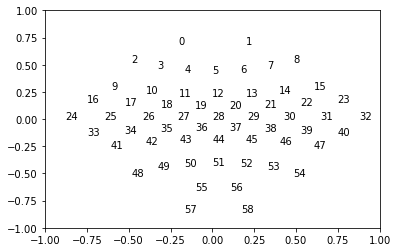

In [74]:
xs=mats[0]['nfo']['xpos'][0][0]
ys=mats[0]['nfo']['ypos'][0][0]
print(xs[0])

for k in range(len(xs)):
    plt.text(xs[k], ys[k], str(k))
    k+=1
    
plt.xlim([-1,1])
plt.ylim([-1,1])

plt.show()

In [25]:
length = 800
x = []
y = []
for mat in mats:
    start_times = mat['mrk'][0][0][0][0]
    i = 0 
    for time in start_times:
        #calculate distance from average
        eeg = mat['cnt'][time:time+length]
        if len(eeg)==length:
            row_means = np.mean(eeg, axis=1)
            for j in range(eeg.shape[1]):
                eeg[:,j]=eeg[:,j]-row_means
            
            #x.append(np.add(np.divide(eeg,6000),0.5))
            x.append(eeg)
            #x.append(mat['cnt'][time:time+length])
            #x.append([mat['cnt'][time:time+length]])
            if mat['mrk'][0][0][1][0][i] == 1:
                y.append(1)
            else:
                y.append(0)
        i+=1
        #break
x = np.array(x)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)
print(x.shape)
print(y.shape)
#print(y[0])
#print(x[0])

(997, 800, 59)
(997,)


In [26]:
average_left=np.zeros(shape=(length,59))
average_right=np.zeros(shape=(length,59))

i=0
for temp in x:
    if y[i]==0:
        average_left=np.add(average_left,temp)
    else:
        average_right=np.add(average_right,temp)
    i+=1

In [43]:
distances =[0] * 59
for e in range(len(average_left)):
    v = abs(average_left[e]-average_right[e])
    print(v)
    break
    for c in range(59):
        distances[c]+=v[c]
distances.index(max(distances))
len(distances)

[22547.  5751. 16897. 15511. 12682. 10435.  9579. 19163.   939. 13035.
 10020. 10336.  3790.  5256.  2503.  4711. 11166.  6046.  3254.  2378.
  9027.   476. 12869.  8602. 14935. 11720.  6450.  1632.  3142.  3677.
  2683.  9994.  3580.  5442.  7641.  1373.  6750. 17298.  7239. 23593.
 13280.  3239.  6263.  5842.  7212.  1105.  4597.  7632.  2158.  6870.
  4197.  5858.  4095.  2230.  8737. 11695.  9137.  9509. 17530.]


59

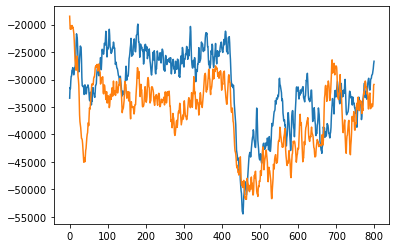

In [60]:
plt.plot(average_left[:,24])
plt.plot(average_right[:,24])
plt.show()

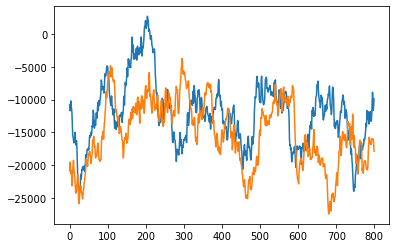

In [65]:
plt.plot(average_left[:,31])
plt.plot(average_right[:,31])
plt.show()

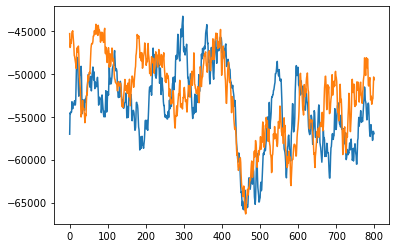

In [61]:
plt.plot(average_left[:,25])
plt.plot(average_right[:,25])
plt.show()

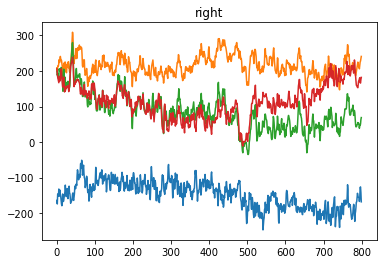

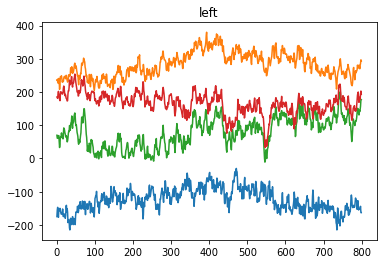

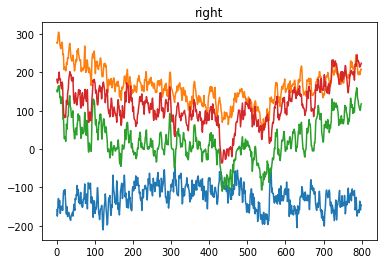

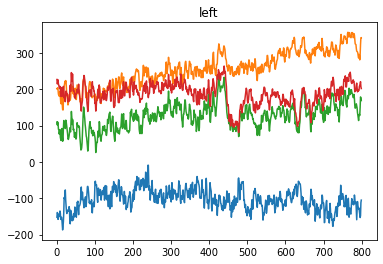

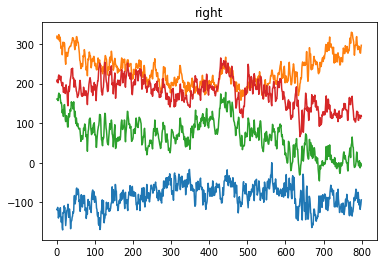

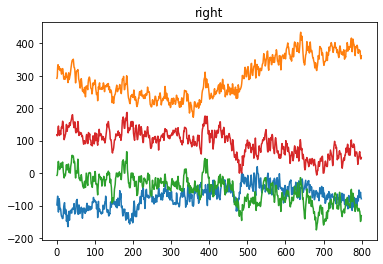

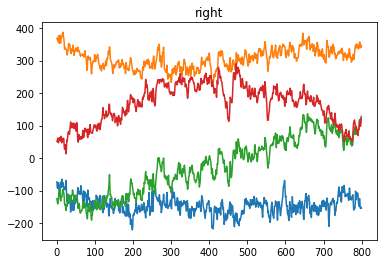

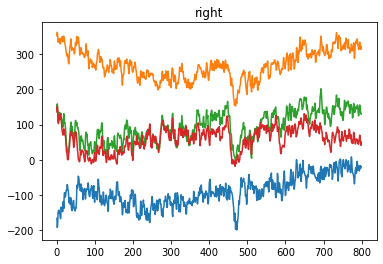

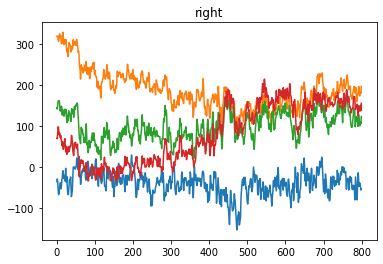

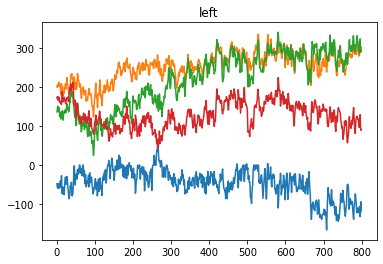

In [82]:
for i in range(0,10):
    plt.plot(np.array(x[i][:,26:30]))
    if y[i]==0:
        plt.title('left')
    else:
        plt.title('right')
    plt.show()


In [46]:
print(x[0])

[[0.50616667 0.44333333 0.5        ... 0.5235     0.46966667 0.49633333]
 [0.50766667 0.44383333 0.5        ... 0.52483333 0.4715     0.5       ]
 [0.5085     0.442      0.5025     ... 0.52066667 0.46983333 0.49233333]
 ...
 [0.50183333 0.4305     0.48716667 ... 0.53383333 0.48216667 0.50183333]
 [0.502      0.42883333 0.48233333 ... 0.535      0.47533333 0.50166667]
 [0.50383333 0.4315     0.48266667 ... 0.5355     0.472      0.49883333]]


In [58]:
input_layer = keras.Input(shape = (length,59,1), name='main_input')
m     = layers.Conv2D(30, 10, padding='same', activation='relu')(input_layer)
m     = layers.Conv2D(40, 10, padding='same', activation='relu')(m)
m     = layers.Conv2D(50, 10, padding='same', activation='relu')(m)
m     = layers.Conv2D(60, 10, padding='same', activation='relu')(m)
m     = layers.Conv2D(70, 10, padding='same', activation='relu')(m)
m     = layers.Conv2D(100, 11, padding='same', activation='relu')(m)
m     = layers.GlobalAveragePooling2D()(m)
m     = layers.Dense(200)(m)
m     = layers.Dense(64)(m)
output = layers.Dense(2, activation='softmax')(m)

model = keras.Model(inputs=input_layer, outputs=output)

model.summary()

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      [(None, 800, 59, 1)]      0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 800, 59, 30)       3030      
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 800, 59, 40)       120040    
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 800, 59, 50)       200050    
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 800, 59, 60)       300060    
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 800, 59, 70)       420070    
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 800, 59, 100)    

In [59]:
opt=optimizers.Adam(learning_rate=1e-3)

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

history = model.fit(X_train,y_train, validation_data=(X_test,y_test),batch_size=32,epochs=100)

Epoch 1/100
25/25 [==============================] - 106s 4s/step - loss: 7.6237 - accuracy: 0.5019 - val_loss: 7.6677 - val_accuracy: 0.4900
Epoch 2/100
25/25 [==============================] - 84s 3s/step - loss: 7.6689 - accuracy: 0.5044 - val_loss: 7.6677 - val_accuracy: 0.4900
Epoch 3/100
25/25 [==============================] - 84s 3s/step - loss: 7.6689 - accuracy: 0.5044 - val_loss: 7.6677 - val_accuracy: 0.4900
Epoch 4/100
25/25 [==============================] - 84s 3s/step - loss: 7.6689 - accuracy: 0.5044 - val_loss: 7.6677 - val_accuracy: 0.4900
Epoch 5/100
25/25 [==============================] - 84s 3s/step - loss: 7.6689 - accuracy: 0.5044 - val_loss: 7.6677 - val_accuracy: 0.4900
Epoch 6/100
 2/25 [=>............................] - ETA: 1:12 - loss: 7.6768 - accuracy: 0.5938

KeyboardInterrupt: 